# Cat or Dog prediction based on 20000 **training** data and 5000 **testing** data.

1. Get the data
2. Preproccess the data
3. Create, Compile and Fit the model
4. Test on custom data

## Get the data

In [1]:
# Import the data set from my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Getting helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-01-22 20:04:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-22 20:04:19 (67.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import helper functions
from helper_functions import unzip_data

In [4]:
unzip_data("/content/drive/MyDrive/archive.zip")

In [5]:
import tensorflow as tf
from tensorflow import keras

## Preproccess the data

In [14]:
# Proccess the data sets
train_data = keras.utils.image_dataset_from_directory(
                  directory="/content/dogs_vs_cats/train",
                  labels="inferred",
                  label_mode="int",
                  batch_size=32,
                  image_size=(224,224)
)

test_data =  keras.utils.image_dataset_from_directory(
                  directory="/content/dogs_vs_cats/test",
                  labels="inferred",
                  label_mode="int",
                  batch_size=32,
                  image_size=(224,224)
                  )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Data augment the data so we get better results and avoid overfitting

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

## Create, Compile and Fit the model

In [18]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation)
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                    epochs=2,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data))) # validate for less steps


Epoch 1/2
625/625 [==============================] - 362s 565ms/step - loss: 0.1158 - accuracy: 0.9628 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 2/2
625/625 [==============================] - 217s 346ms/step - loss: 0.0682 - accuracy: 0.9748 - val_loss: 0.0291 - val_accuracy: 0.9928


In [19]:
# evaluate the model on the full testing data
model_1.evaluate(test_data)

157/157 [==============================] - 10s 60ms/step - loss: 0.0273 - accuracy: 0.9908


[0.02730761468410492, 0.9908000230789185]

In [33]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 1)                 1281

Text(0.5, 0, 'Epochs')

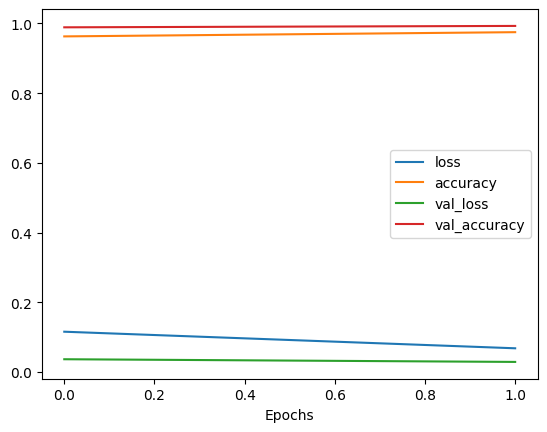

In [35]:
import pandas as pd
pd.DataFrame(history_1.history).plot()
plt.xlabel("Epochs")

## Testing on custom images from the internet

In [ ]:
!wget https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=0.752xw:1.00xh;0.175xw,0&resize=1200:*

In [24]:
import cv2
import matplotlib.pyplot as plt


In [22]:
test_img = cv2.imread("/content/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=0.752xw:1.00xh")

(-0.5, 1502.5, 1498.5, -0.5)

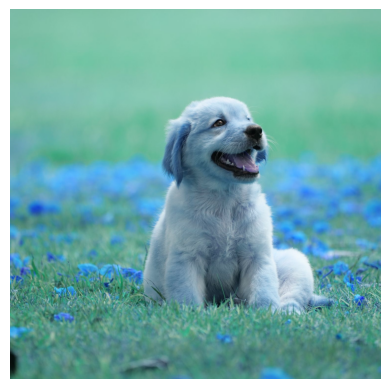

In [26]:
plt.imshow(test_img)
plt.axis(False)

In [28]:
# If Result == 1 That means its a dog correct
test_img = cv2.resize(test_img, (224,224))
test_input = test_img.reshape((1, 224, 224, 3))
tf.round(model_1.predict(test_input))

1/1 [==============================] - 0s 133ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
!wget https://hips.hearstapps.com/hmg-prod/images/beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg?crop=1xw:0.84415xh;center,top

In [30]:
test_img = cv2.imread("/content/beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg?crop=1xw:0.84415xh")

(-0.5, 2120.5, 1193.5, -0.5)

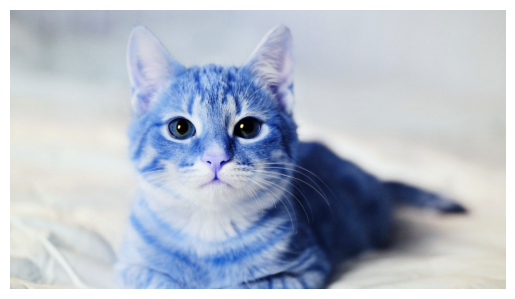

In [31]:
plt.imshow(test_img)
plt.axis(False)

In [32]:
# If Result == 0 That means its a cat correct
test_img = cv2.resize(test_img, (224,224))
test_input = test_img.reshape((1, 224, 224, 3))
tf.round(model_1.predict(test_input))

1/1 [==============================] - 0s 39ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>